In [130]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
filenames = ["./results/deepnf_results.txt", "./results/pydeepnf_results.txt"]
methods = ['deepNF', 'pydeepNF']
colors = ['r','b']

In [81]:
def result_file_reader(filename, metric_to_compare):
    metrics = ['m_aupr','M_aupr', 'f1', 'acc']
    if metric_to_compare in metrics:
        with open(filename) as f:
            lines = f.readlines()
            result = []
            for line in lines:
                if 'Test dataset' in line:
                    splitted_line = line.rstrip().split(" ")
                    ls = []
                    for i in range(4):
                        ls.append(float(splitted_line[5+i*3].replace(',','')))
                    result.append(np.array(ls))
        result = np.array(result)
        return result[:,metrics.index(metric_to_compare)]
    else: 
        print("Try a valid metric among:", metrics)
        return None

In [139]:
metric_to_compare = 'm_aupr'
def plot_metrics(metric_to_compare):
    results = []
    for filename in filenames: 
        res = result_file_reader(filename, metric_to_compare)
        results.append(res)
    x = np.arange(10)
    num_of_subfigures = int(results[0].shape[0]/10)
    result_list = [] 
    for r in results:
        result_list.append(np.split(r, num_of_subfigures))

    fig, axarr = plt.subplots(num_of_subfigures, sharex=True)
    fig.set_size_inches(20, 8)
    
    ind = 0
    for ax in axarr:
        ax.set_ylabel(metric_to_compare, fontsize=12)
        # ax.axhline(y=0.839)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        if ind == 0:
            ax.set_title("Comparison of %s" %metric_to_compare)
        for k in range(len(result_list)):    
            ax.plot(x, result_list[k][ind], color=colors[k], markersize= 10, marker= "o",linewidth=2, label=methods[k])
        ax.legend()
        ind += 1
    ax.set_xlabel("Number of executions", fontsize=12)
    # fig.title("comparison of m_aupr")
    plt.show()

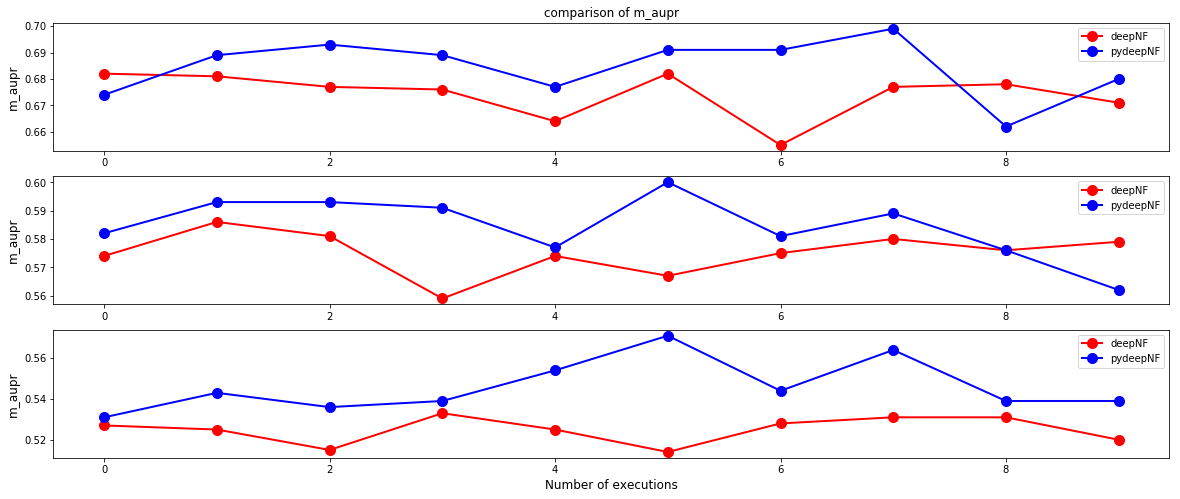

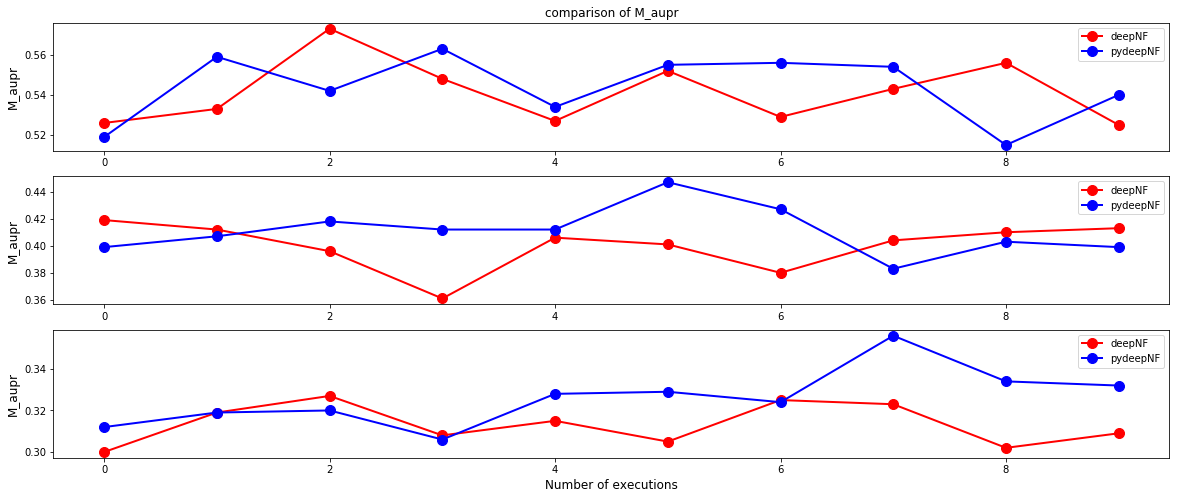

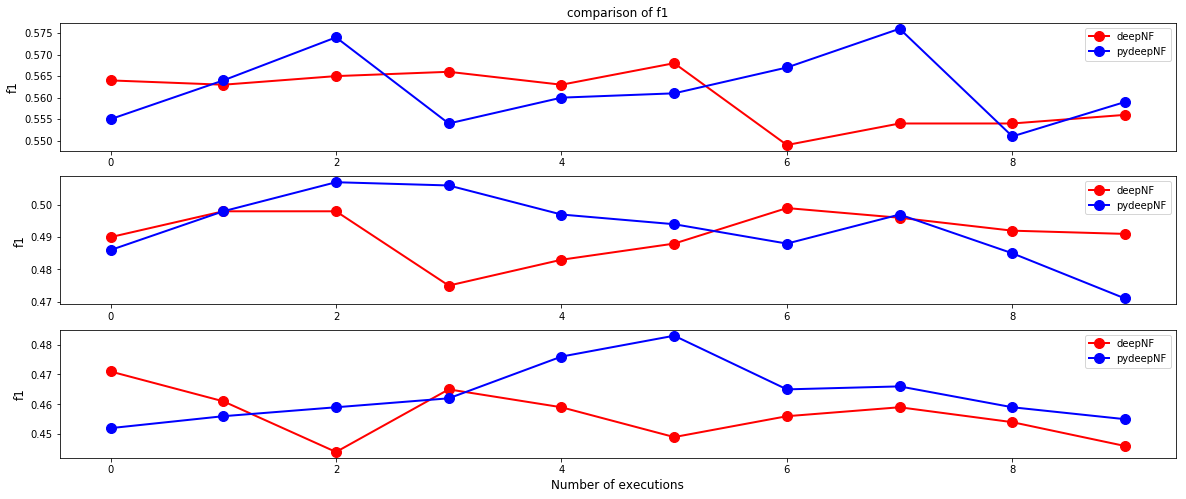

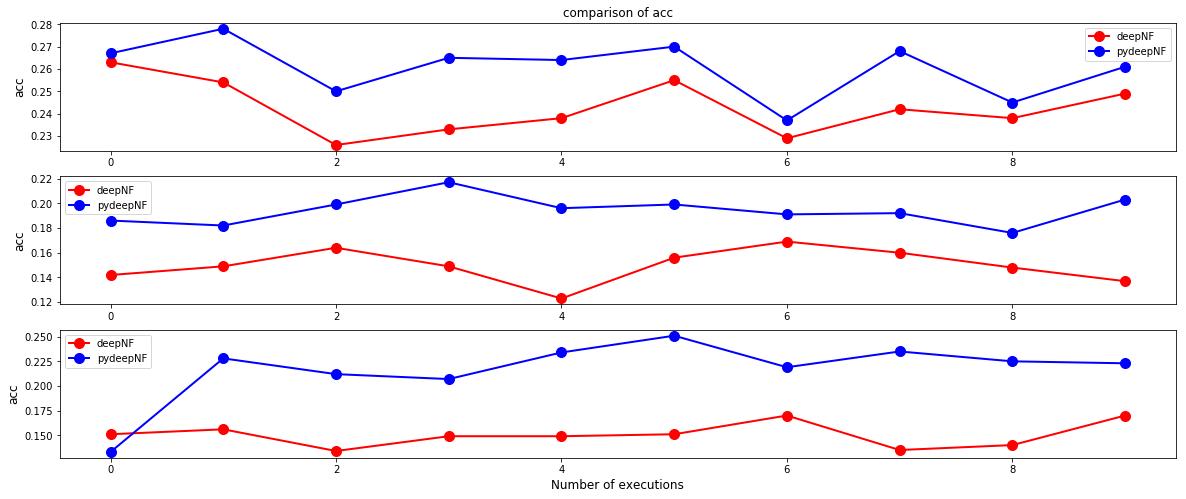

In [141]:
metrics = ['m_aupr','M_aupr', 'f1', 'acc']
for metric_to_compare in metrics:
    plot_metrics(metric_to_compare)